## King County Media Home Value

In [4]:
# import necessary libraries
import pandas as pd
import numpy as np

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [6]:
# Data loading
df = pd.read_csv("./data/kc_house_data.csv")
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Exploratory Data Analysis and Data Cleaning

In [8]:
df.shape

(21597, 21)

In [9]:
df.info

<bound method DataFrame.info of                id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  

In [10]:
df.describe

<bound method NDFrame.describe of                id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view

Check for missing values

In [11]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### fill the missing values

In [12]:
df.fillna(df.mode().iloc[0], inplace= True)

In [13]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Construct Pair Plot

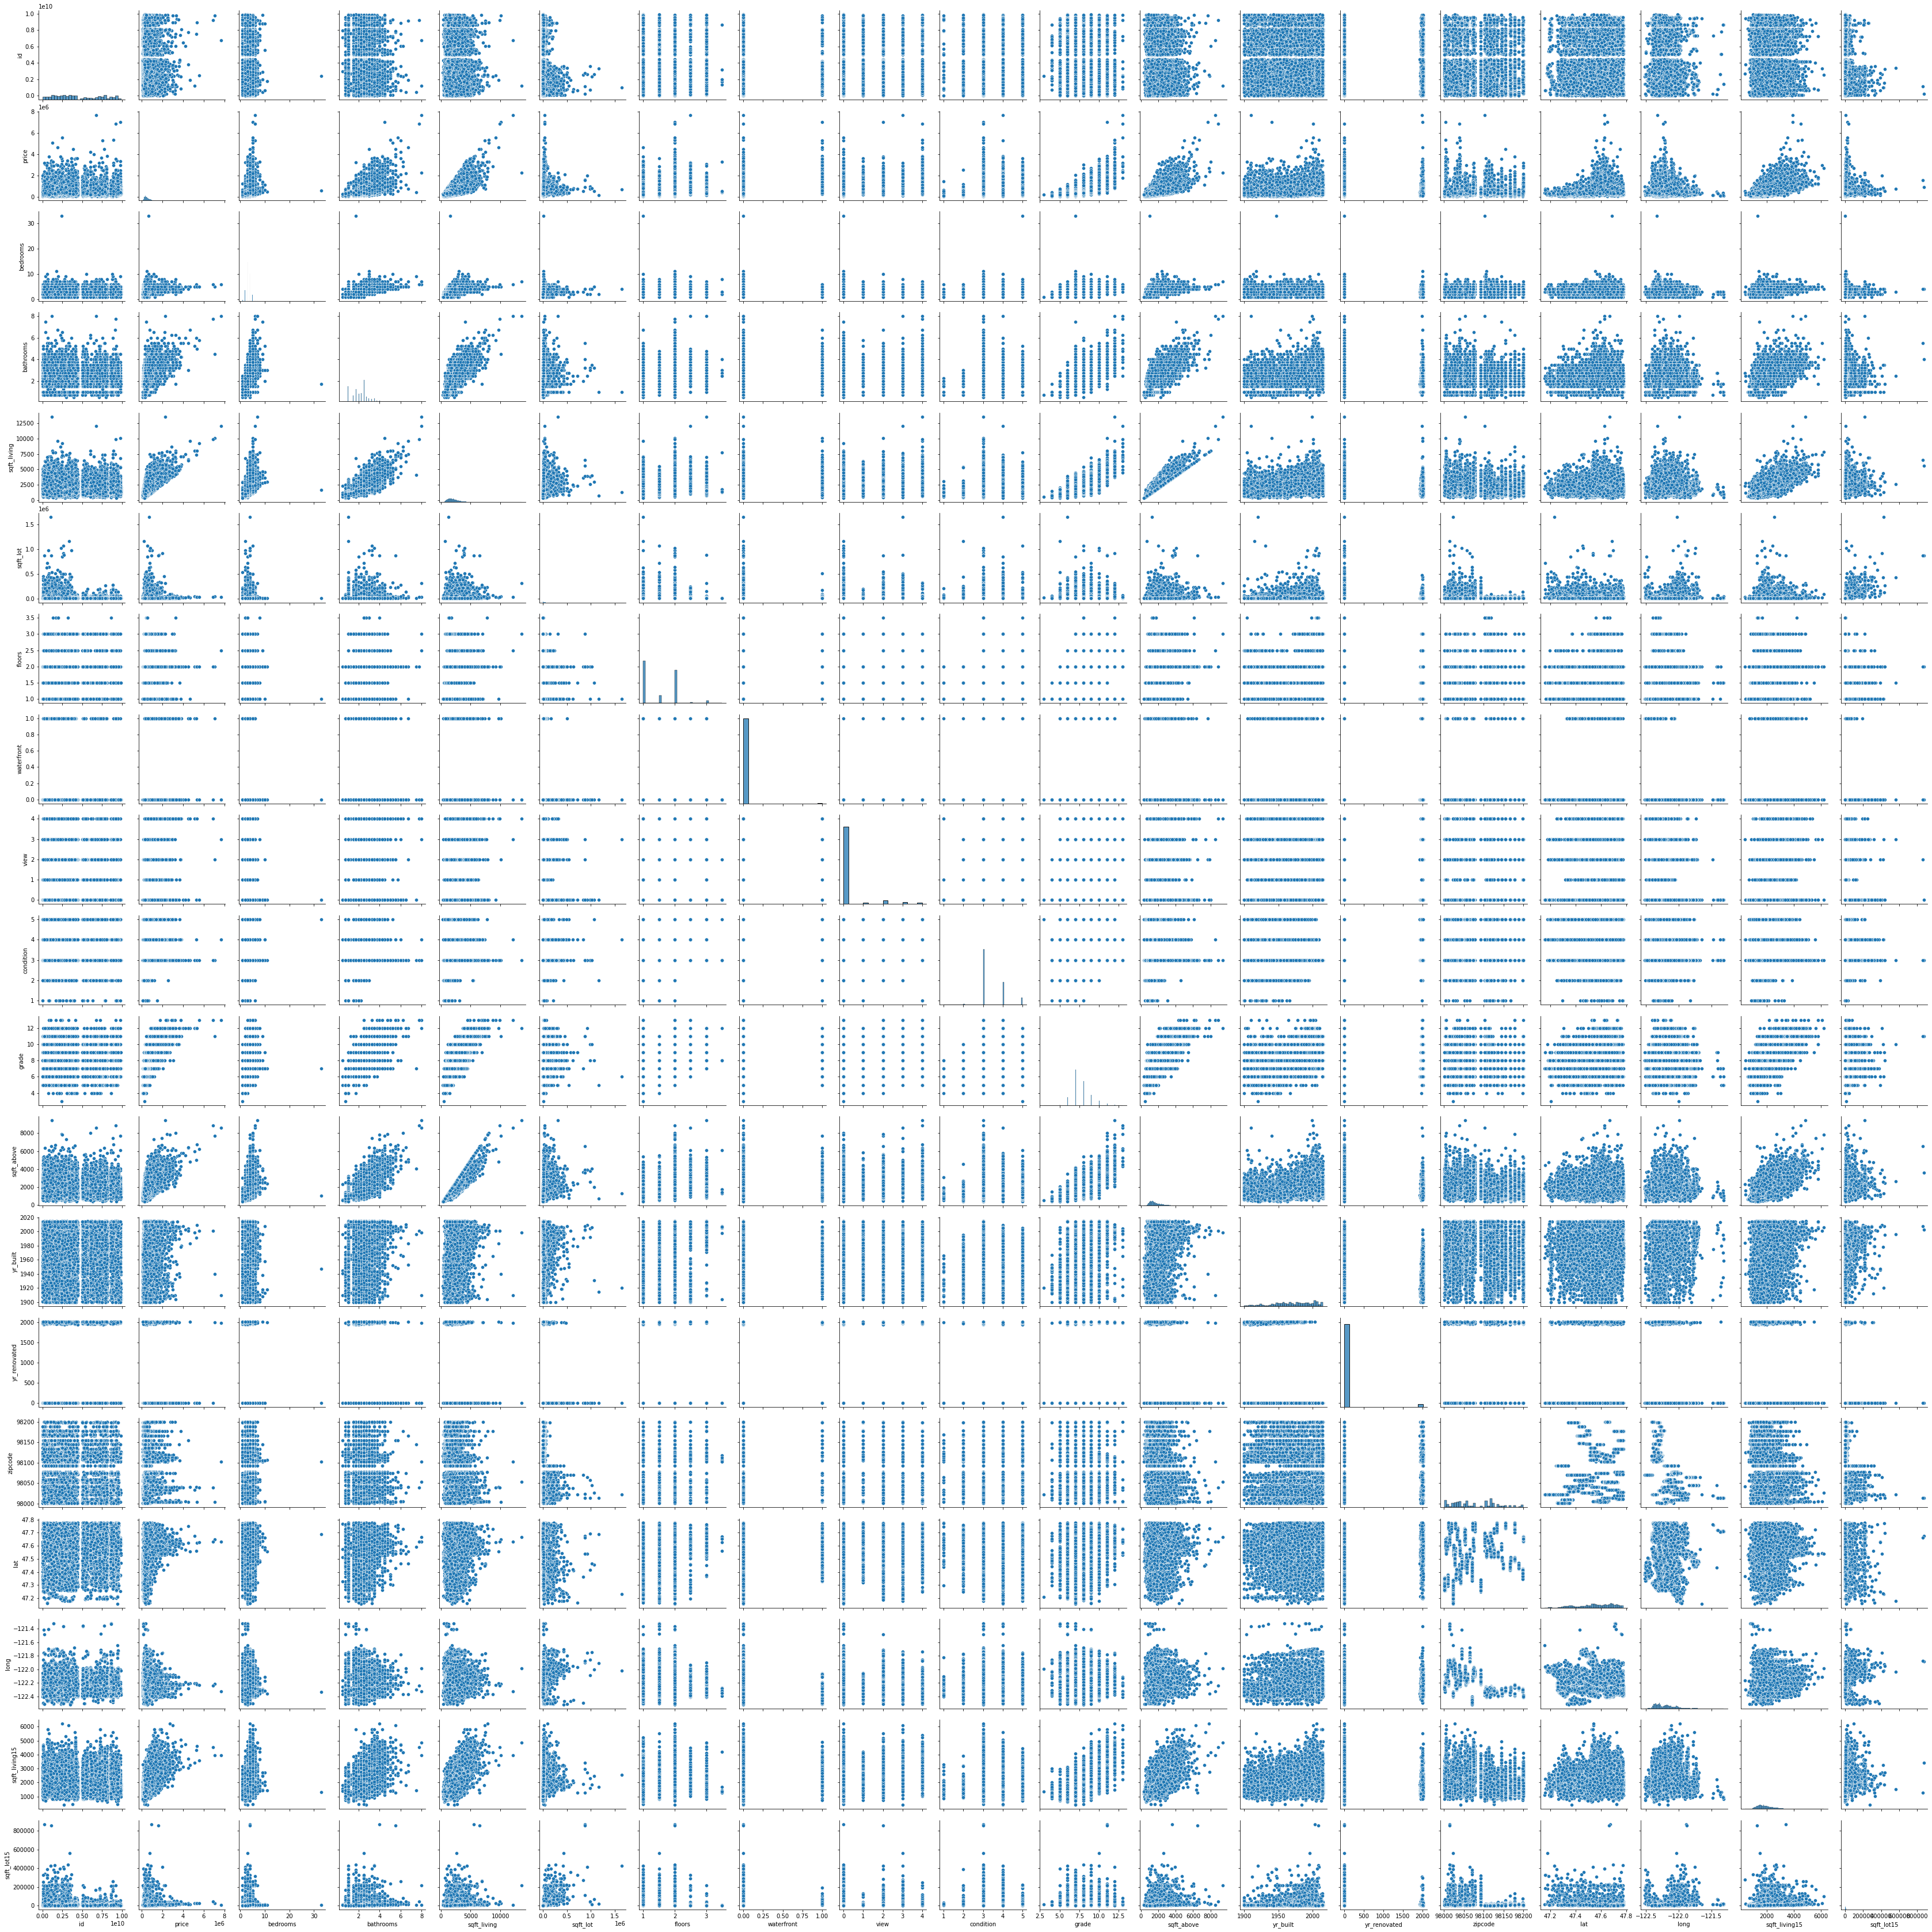

In [14]:
sns.pairplot(data=df)

In [15]:
# convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [16]:
# convert datetime to integer
df['date_int'] = df['date'].astype('int64') // 10**9  # Convert to Unix timestamp (seconds since epoch)

In [17]:
# drop original date column
df.drop(columns= ['date'], inplace= True)

In [18]:
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date_int         0
dtype: int64

### Construct correlation HeatMap for better summary

In [19]:
# Replace non-numeric values with NaN
df = df.replace('?', np.nan)
df = df.apply(pd.to_numeric, errors='coerce')

In [20]:
# Compute the correlation matrix
corr = df.corr()

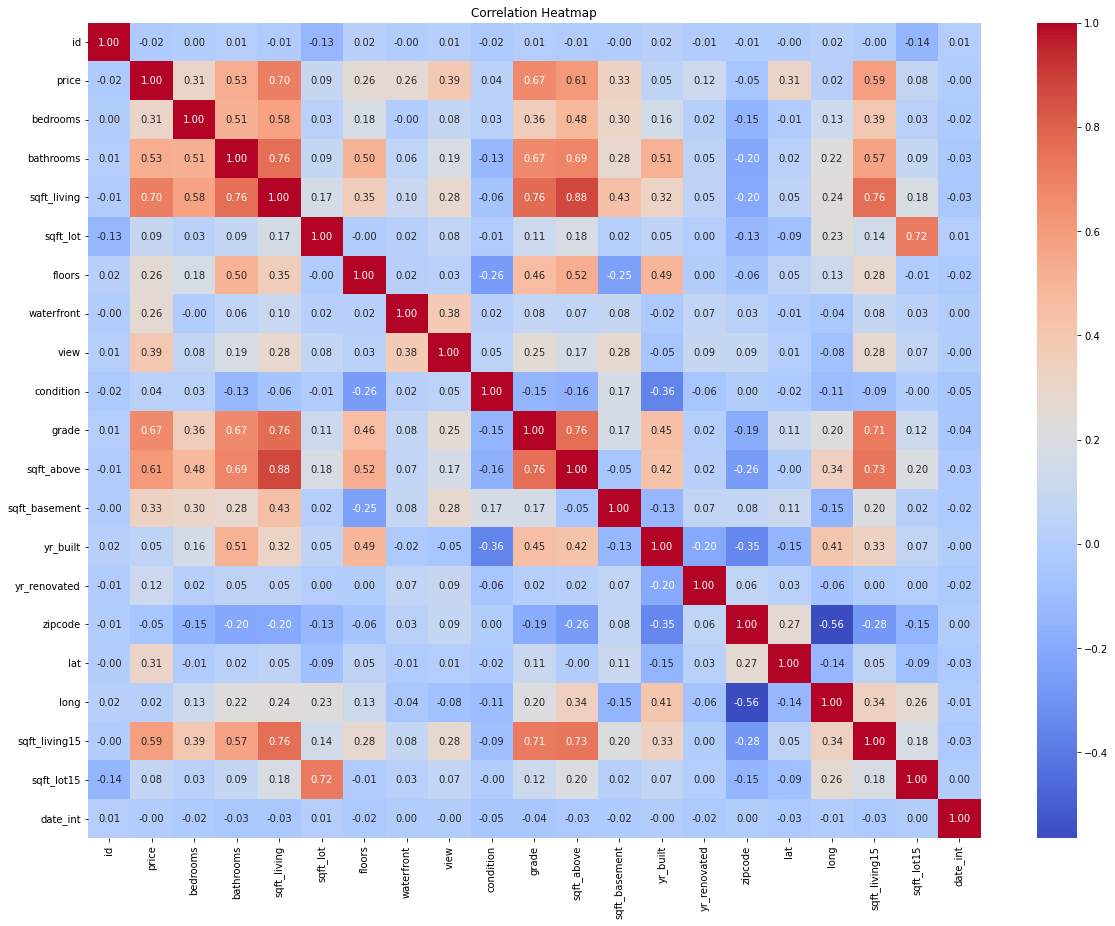

In [21]:
# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Feature Selection

In [22]:
df = df [['sqft_above','grade','sqft_living','sqft_living15','price']]
df.head()

sqft_above  grade  sqft_living  sqft_living15     price
0        1180      7         1180           1340  221900.0
1        2170      7         2570           1690  538000.0
2         770      6          770           2720  180000.0
3        1050      7         1960           1360  604000.0
4        1680      8         1680           1800  510000.0

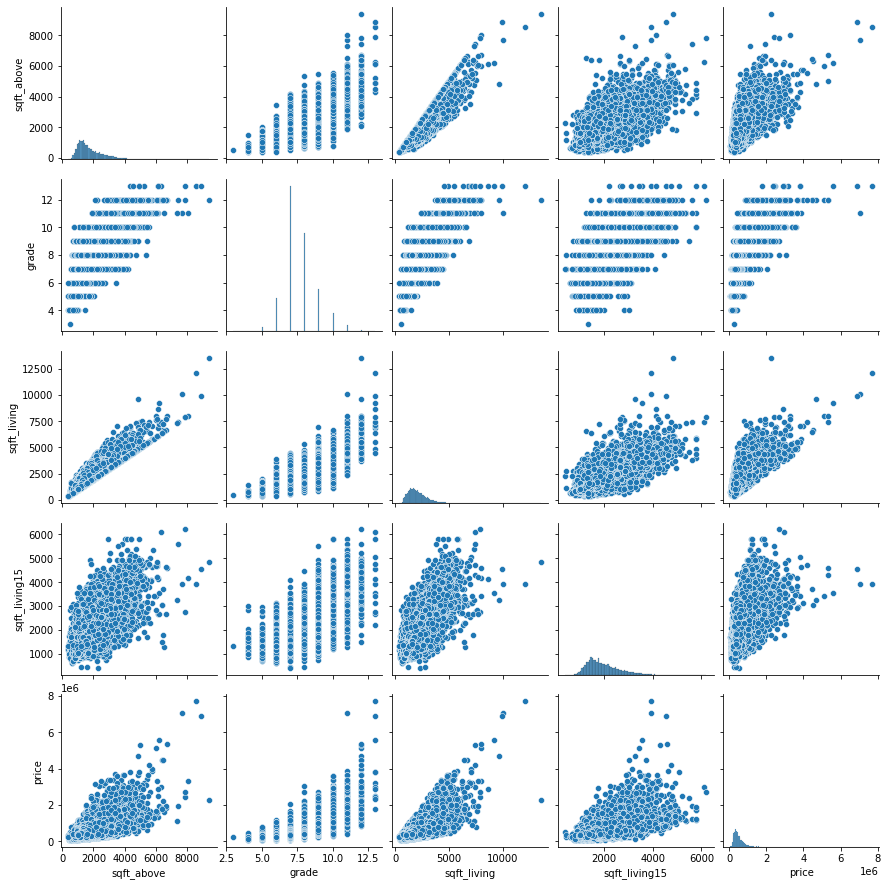

In [23]:
# replot pair plot
sns.pairplot(data=df)

<Axes: >

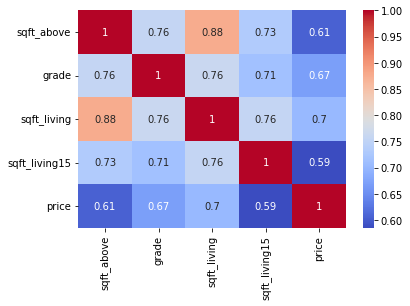

In [24]:
# replot heatmap
plt.Figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap="coolwarm", annot= True)

In [25]:
# drop sqft_living15 due to high cardinality with sqft_living
df.drop(columns=['sqft_living15'], inplace= True)

## Data Cleaning

In [26]:
import seaborn as sns

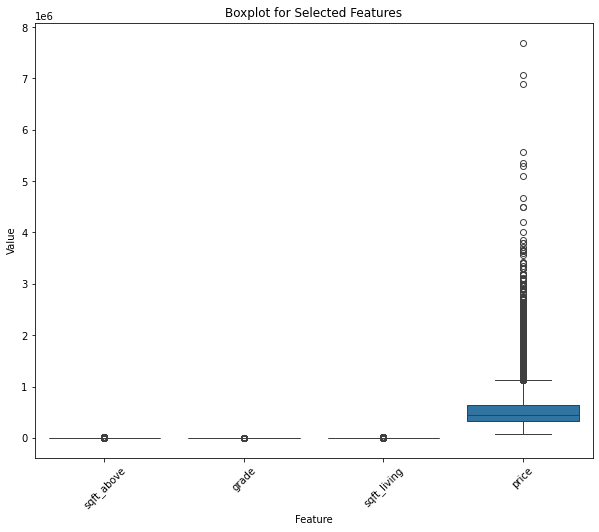

In [27]:
df_melted = df.melt(var_name='Feature', value_name='Value')

plt.figure(figsize=(10, 8))
sns.boxplot(x='Feature', y='Value', data=df_melted)
plt.title('Boxplot for Selected Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

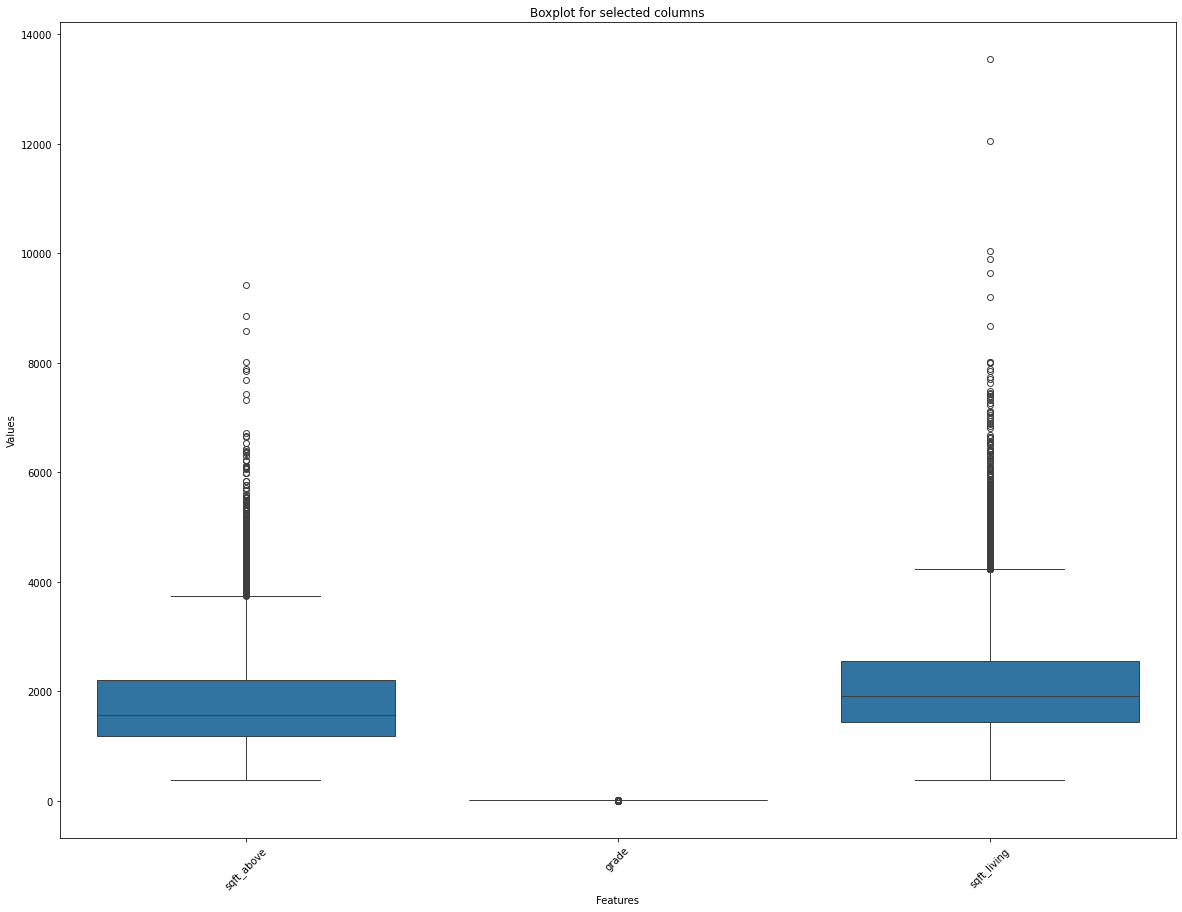

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df_melted = df.drop(columns=['price']).melt(var_name='Feature', value_name='Value')
plt.figure(figsize=(20,15))
sns.boxplot(x='Feature', y='Value', data=df_melted)
#sns.boxplot(data=df_melted[['sqft_above','grade','sqft_living']])
plt.title('Boxplot for selected columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [29]:
# calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

# Get the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier = ((df<lower_bound) | (df>upper_bound)).any(axis=1)

outlier_indices = df.index[outlier]

# drop outliers
df = df.drop(outlier_indices)

In [30]:
df.head(10)

sqft_above  grade  sqft_living     price
0         1180      7         1180  221900.0
1         2170      7         2570  538000.0
2          770      6          770  180000.0
3         1050      7         1960  604000.0
4         1680      8         1680  510000.0
6         1715      7         1715  257500.0
7         1060      7         1060  291850.0
8         1050      7         1780  229500.0
9         1890      7         1890  323000.0
10        1860      8         3560  662500.0

In [31]:
df.shape

(19117, 4)

## Data Analysis

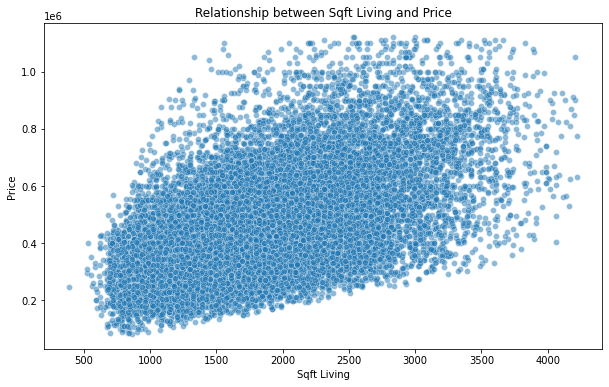

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['sqft_living'], y=df['price'], alpha=0.5)  # alpha for transparency
plt.title('Relationship between Sqft Living and Price')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.show()


THere is a positive linear relationship between Price and Sqft Living since as the price Sqft Living increases, price also increases linearly

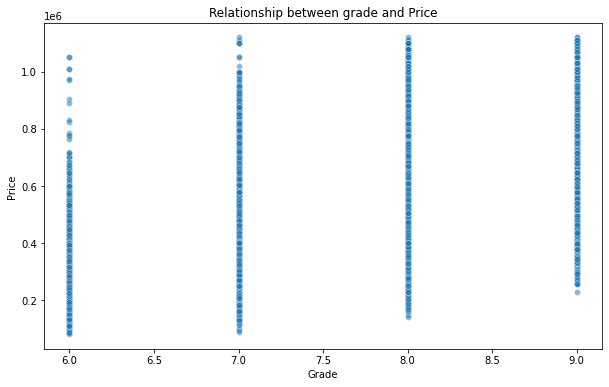

In [33]:
# To check the relatinship between 'Price' and 'grade'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['grade'], y=df['price'], alpha=0.5)  # alpha for transparency
plt.title('Relationship between grade and Price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

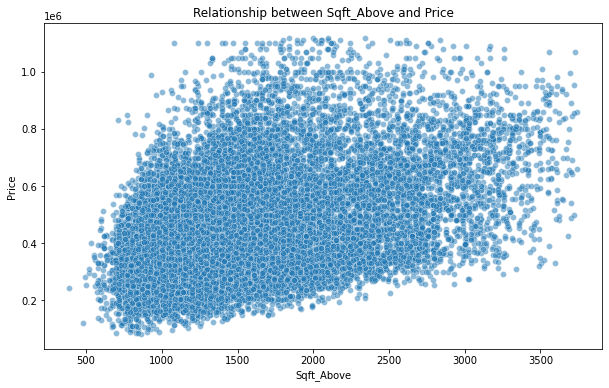

In [34]:
# To check the relationship between 'Sqft_Above' and 'Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['sqft_above'], y=df['price'], alpha=0.5)  # alpha for transparency
plt.title('Relationship between Sqft_Above and Price')
plt.xlabel('Sqft_Above')
plt.ylabel('Price')
plt.show()

### Data Preparation for modelling

In [37]:
x = df[['sqft_living','grade','sqft_above']]
x.head()

sqft_living  grade  sqft_above
0         1180      7        1180
1         2570      7        2170
2          770      6         770
3         1960      7        1050
4         1680      8        1680

In [38]:
y = df['price']
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [43]:
# Train the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [44]:
# scale the data
Scaler = StandardScaler()

In [45]:
x_train_scaled = Scaler.fit_transform(x_train)
x_test_scaled = Scaler.transform(x_test)

## Modelling

In [46]:
model = LinearRegression()

In [47]:
#training the model
model.fit(x_train_scaled,y_train)

LinearRegression()

In [48]:
y_pred = model.predict(x_test_scaled)

df = pd.DataFrame({"True": y_test, "pred": y_pred})
df.head()

## Validation

In [50]:
# Validating model performance
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("mse", mse)
print("mae", mae)
print("R2", r2)

mse 22537261061.620438
mae 119803.28519559516
R2 0.3960864235616879
